<a href="https://colab.research.google.com/github/chiranjeevimacharla90/Machine-learning-using-python/blob/main/Clusterring/Hierarchial_Clusterring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clusterring Income Spent Using Hierarchial clusterring**

## Importing the basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_HC.csv to dataset_HC.csv


## Importing the dataset

In [4]:
dataset = pd.read_csv('dataset_HC.csv')

### Summarize Dataset

In [5]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


### Label Encoding

In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Dendrogram Data visualization

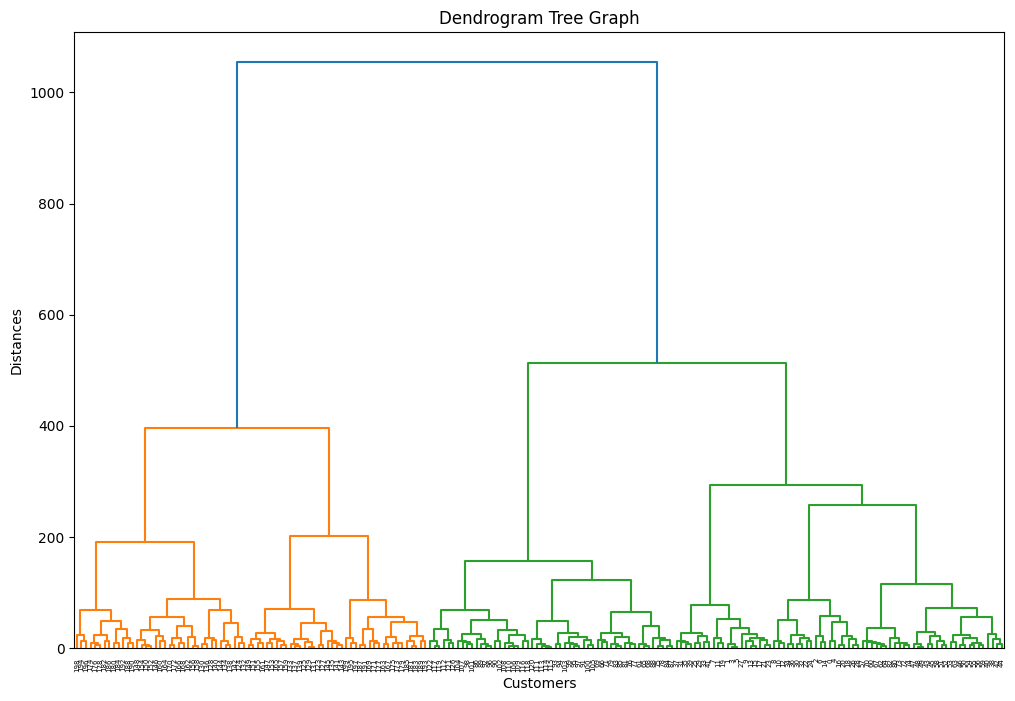

In [7]:
import scipy.cluster.hierarchy as clus

plt.figure(1, figsize = (12 ,8))
dendrogram = clus.dendrogram(clus.linkage(dataset, method  = "ward"))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

### Fitting the Hierarchial clustering to the dataset with n=5

In [8]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
y_means = model.fit_predict(dataset)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

### Visualizing the number of clusters n=5

Cluster 1: Customers with Medium Income and Medium Spending

Cluster 2: Customers with High Income and High Spending

Cluster 3: Customers with Low Income and Low Spending

Cluster 4: Customers with High Income and Low Spending

Cluster 5: Customers with Low Income and High Spending

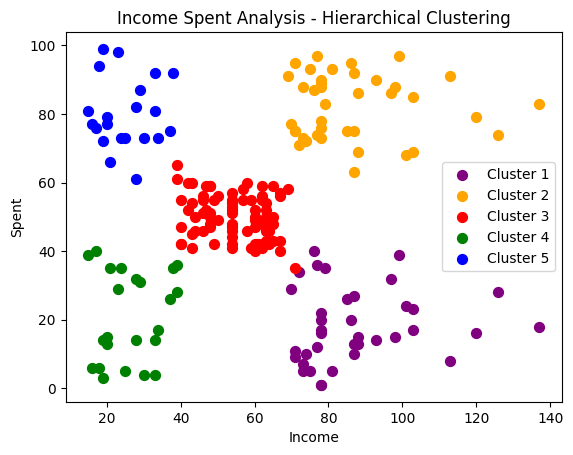

In [9]:
X = dataset.iloc[:, [3,4]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label ='Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label ='Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label ='Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()